In [1]:
%matplotlib inline 

In [2]:
import pandas

In [14]:
data=pandas.read_csv('../../../data/DOMCityPairsWeb.csv', parse_dates=[[10,11]], index_col = 'Year_Month_num')

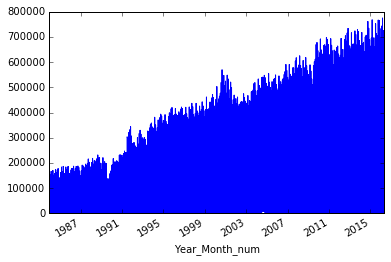

In [16]:
data.Passenger_Trips.plot()

In [20]:
syd_melb=data[(data.City2=='SYDNEY')&(data.City1=='MELBOURNE')]

In [24]:
facebook = pandas.read_csv('../../../data/facebook-share-price.csv')
facebook.Close

0       113.019997
1       114.389999
2       114.599998
3       114.940002
4       113.949997
5       116.620003
6       118.559998
7       118.389999
8       117.760002
9       118.790001
10      118.470001
11      118.930000
12      118.779999
13      118.809998
14      119.379997
15      119.470001
16      117.889999
17      117.699997
18      115.970001
19      117.349998
20      116.809998
21      117.650002
22      117.349998
23      118.669998
24      119.809998
25      120.279999
26      119.519997
27      120.500000
28      119.239998
29      119.489998
           ...    
997      31.100000
998      31.360001
999      32.230000
1000     33.099998
1001     32.060001
1002     33.049999
1003     31.840000
1004     31.600000
1005     31.910000
1006     31.410000
1007     30.010000
1008     28.290001
1009     27.270000
1010     27.400000
1011     27.010000
1012     27.100000
1013     26.309999
1014     26.809999
1015     25.870001
1016     26.900000
1017     27.719999
1018     29.

In [28]:
facebook['data_col']=pandas.date_range('2016-06-17', periods=1027,freq='-1B')

In [29]:
new_series = pandas.Series(data=list(facebook.Close), index=facebook.data_col)

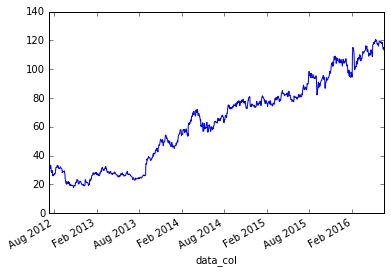

In [30]:
new_series.plot()

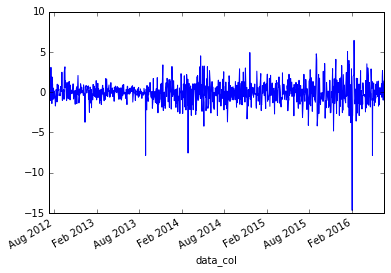

In [33]:
# showing the facebook share price change 
difference = (new_series - new_series.shift(1))
difference.plot()

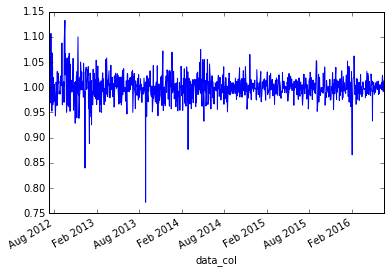

In [34]:
(new_series/new_series.shift(1)).plot()

In [39]:
syd_melb.Aircraft_Trips.resample("A").max()

Year_Month_num
1984-12-31    1534
1985-12-31    1678
1986-12-31    1707
1987-12-31    1836
1988-12-31    1995
1989-12-31    2014
1990-12-31    2159
1991-12-31    2480
1992-12-31    3042
1993-12-31    2700
1994-12-31    2930
1995-12-31    2964
1996-12-31    3094
1997-12-31    3055
1998-12-31    3085
1999-12-31    3184
2000-12-31    4005
2001-12-31    4601
2002-12-31    2941
2003-12-31    3147
2004-12-31    3612
2005-12-31    3550
2006-12-31    3746
2007-12-31    3903
2008-12-31    4166
2009-12-31    4350
2010-12-31    4540
2011-12-31    4485
2012-12-31    4944
2013-12-31    4824
2014-12-31    4972
2015-12-31    5301
2016-12-31    5129
Freq: A-DEC, Name: Aircraft_Trips, dtype: int64

In [41]:
syd_melb.Aircraft_Trips.rolling?

In [42]:
import sys

In [44]:
sys.path.append('../../../labs/Week 8')

In [50]:
import holtwinters

holtwinters.multiplicative(list(syd_melb.Aircraft_Trips)[:-24],12,24)

([4375.9386401571828,
  4740.3774227136655,
  4729.4946193678416,
  4661.2521835703474,
  4810.4823276310735,
  4714.6364552671812,
  4580.7324940789395,
  4414.7052018673476,
  4389.9395775190851,
  4814.4505296314082,
  4627.8429672201082,
  4798.9554940056942,
  4468.9910113765991,
  4841.001111282455,
  4829.7100271942045,
  4759.8474730936723,
  4912.0551088022985,
  4814.010605718533,
  4677.114949856179,
  4507.431717113468,
  4481.9848054141466,
  4915.2205376270176,
  4724.538481961511,
  4899.0519971542381],
 0.0,
 0.99993736965309177,
 0.29583264744269039,
 334.15021021019385)

In [52]:
prediction = holtwinters.multiplicative(list(syd_melb.Aircraft_Trips)[:-24], 12,48)

In [53]:
(data,level_decay,trend_decay,seasonal_decay,root_mse) = prediction

In [54]:
pandas.date_range('2014-05-01', periods=48,freq='M')

DatetimeIndex(['2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30'],
              dtype='datetime64[ns]', freq='M')

In [57]:
predicted_aircraft_trips=pandas.Series(data=data, index=pandas.date_range('2014-05-01', periods=48,freq='M'))

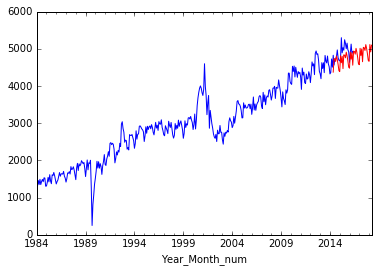

In [59]:
syd_melb.Aircraft_Trips.plot()
predicted_aircraft_trips.plot(c='Red')

In [60]:
import statsmodels.api

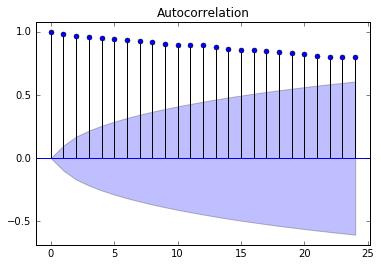

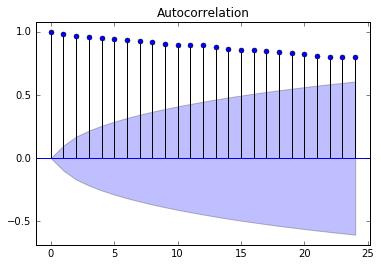

In [62]:
statsmodels.api.graphics.tsa.plot_acf(syd_melb.Passenger_Trips, lags=24)

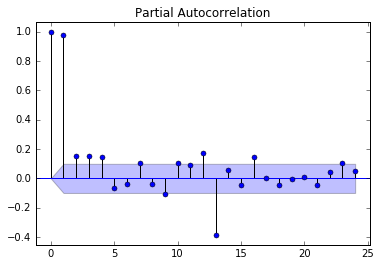

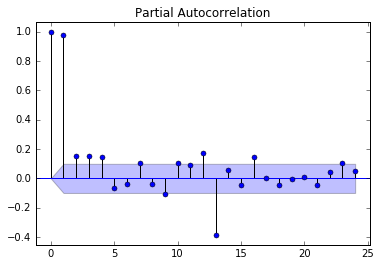

In [63]:
statsmodels.api.graphics.tsa.plot_pacf(syd_melb.Passenger_Trips, lags=24)

In [66]:
dcr =statsmodels.api.tsa.seasonal_decompose(syd_melb.Passenger_Trips, freq=12, model='multiplicative')

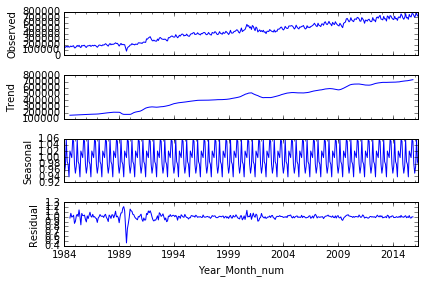

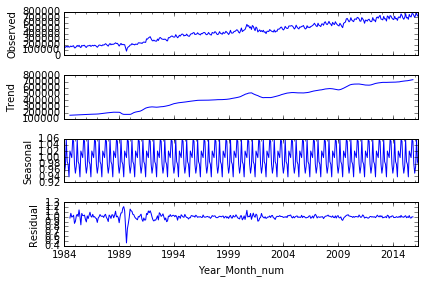

In [67]:
dcr.plot()

In [68]:
planes_dcr = statsmodels.api.tsa.seasonal_decompose(syd_melb.Aircraft_Trips,freq=12, model='multiplicative')

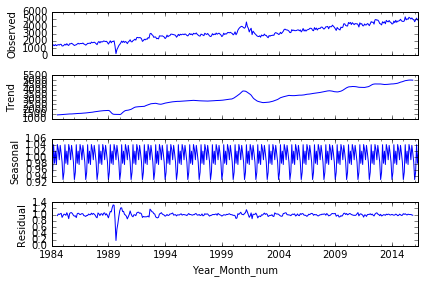

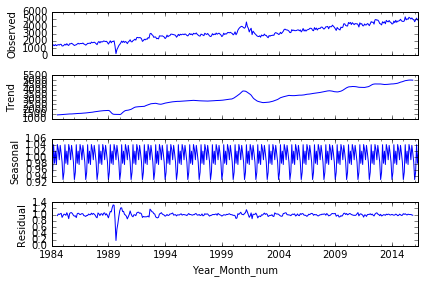

In [69]:
planes_dcr.plot()

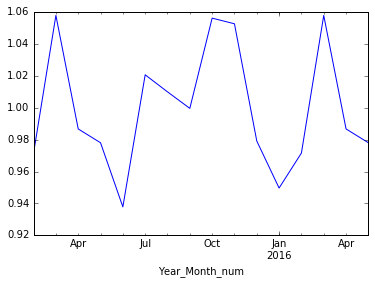

In [70]:
dcr.seasonal[dcr.seasonal.index>'2015-01-01'].plot()

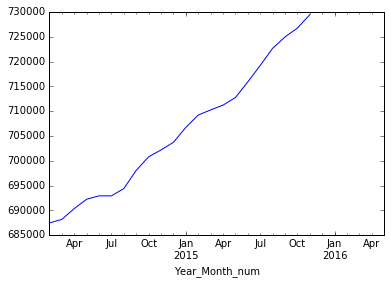

In [71]:
dcr.trend[dcr.trend.index>'2014-01-01'].plot()

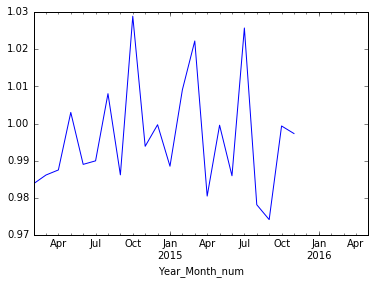

In [72]:
dcr.resid[dcr.resid.index>'2014-01-01'].plot()

## ARIMA model

In [77]:
detrend = statsmodels.api.tsa.detrend(syd_melb.Passenger_Trips)

In [74]:
import matplotlib.pyplot

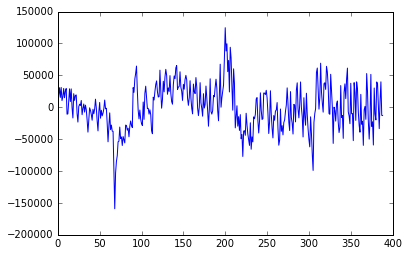

In [78]:
matplotlib.pyplot.plot(detrend)

In [79]:
trend=syd_melb.Passenger_Trips-detrend

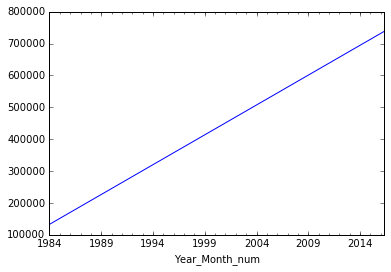

In [80]:
trend.plot()

In [81]:
detrend[0::12].mean()

-19497.252282208367

In [82]:
detrend[9::12].mean()

24910.703617344756

In [83]:
monthly_trends =[]
for i in range(12):
    monthly_trends.append(detrend[i::12].mean())

In [84]:
monthly_trends=[detrend[i::12].mean() for i in range(12)]

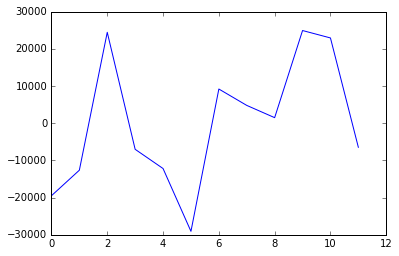

In [85]:
matplotlib.pyplot.plot(monthly_trends)

In [87]:
deseasoned = detrend - (monthly_trends*50)[:len(detrend)]

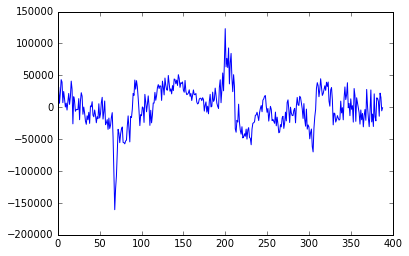

In [88]:
matplotlib.pyplot.plot(deseasoned)

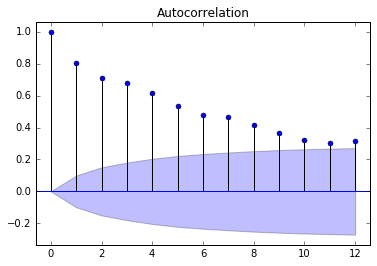

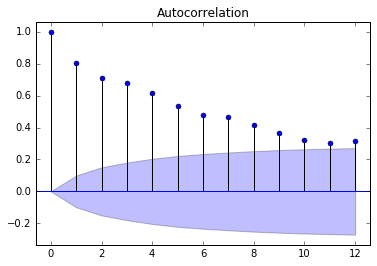

In [90]:
statsmodels.api.graphics.tsa.plot_acf(deseasoned, lags=40)

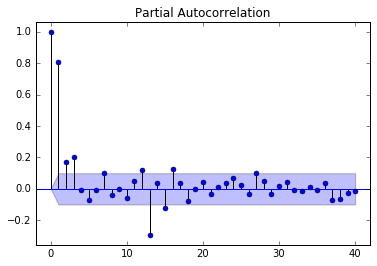

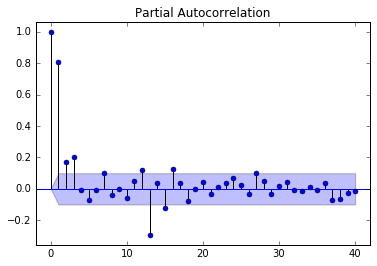

In [91]:
statsmodels.api.graphics.tsa.plot_pacf(deseasoned, lags=40)

In [94]:
a=statsmodels.api.tsa.ARIMA(deseasoned, (12,0,3))

In [96]:
arw = a.fit()

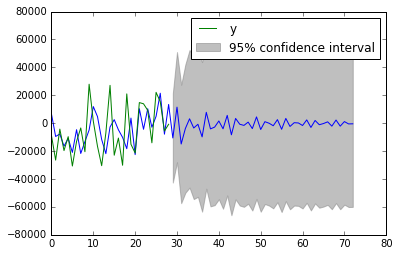

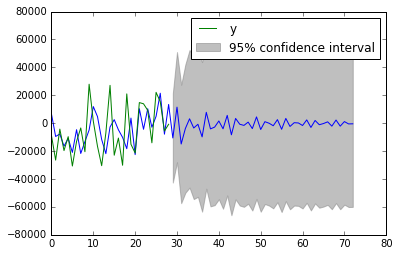

In [102]:
arw.plot_predict(360,432)